# Tutorial: Projekt Steinkauz

## Notebook: Tutorial

See the [Steinkauz repository](https://github.com/bjornrommel/steinkauz).

## Introduction

Projekt Steinkauz presents Jupyter notebooks on various topics of seismic acquisition and processing. These notebooks shall be written out in high print quality. To that end, the text shall be written in LaTeX, the standard for scientific publications. However, since Jupyter Notebook can only handle a subset of LaTeX, I have developed a Jupyter magic allowing all(!) LaTeX. Integrated in your Jupyter notebook, the magic can collect any user-generated information -- data analyses, mathematical calculations, visual displays or simply additional text -- and integrate it into a pre-set layout. In this way, the user can generate a high-quality, yet interatively generated textbook based only on the rich environment of a Jupyter Notebook plus a magic, also called steinkauz.

## Loading

As said, steinkauz is a Jupyter magic. Hence, a Jupyter Notebook invokes it simply by calling
    
    %reload_ext steinkauz
    
Do it first!

In [1]:
%reload_ext steinkauz

## Line Magic

In the most simple case, a LaTeX fragment \<latex\> is read in from the Jupyter Notebook itself:  

    %steinkauz r"""<latex>"""
    
Enclosing the LaTeX fragment with r" " " and " " ", respectively, prevents the Python kernel from screwing up LaTeX's escape characters. 

So, let's try:

In [2]:
%steinkauz r"""\Large Tutorial: Project Steinkauz"""

## Cell Magic

A line magic is, of course, limited to a line, ideal only for text snippets. However, a LaTeX fragment \<latex\> can also be input from a cell:  

    %%steinkauz
    r"""
    <latex>
    """
    
Again, enclosing the LaTeX fragment with r" " " and " " ", respectively, prevents the Python kernel from screwing up LaTeX's escape characters. Of course, the hidden newline characters will also be removed.

So, let's write a title, for example:

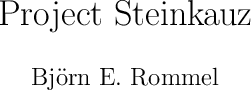

In [3]:
%%steinkauz 
r"""
\title{Project Steinkauz}
\author{Bj\"orn E. Rommel}
\date{}
\maketitle
"""

## Saving

The cell magic can handle arbitrary LaTeX fragments. However, collecting both the original LaTeX fragment and its final printout might appear overloaded. Also, a typical use case has turned out to follow a dual approach: writing a LaTeX document on the subject matter, writing a Jupyter Notebook to explore the mathematics in a graphical output, and phasing computational results, figures, tables, etc into the LaTeX document. Kind of personalizing a LaTeX document!

To that end, any LaTeX fragment can be stored on disk. The extent of such a LaTeX fragment -- an entire section, the caption of a figure, an equation, etc -- is left to your imagination. However, for reasons later explained, each LaTeX fragment is best stored in a separate file in a separate directory:

    %%steinkauz --texfile <tex file> --texdir <directory>
    r"""
    <latex>
    """

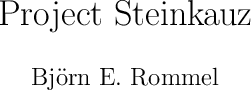

In [4]:
%%steinkauz --texfile title --texdir title
r"""
\title{Project Steinkauz}
\author{Bj\"orn E. Rommel}
\date{}
\maketitle
"""

The same holds for the corresponding line magic.

In [5]:
%steinkauz --texfile repo --texdir repo r"""See the Steinkauz repository."""

The output above can also be retrieved from file by simply omitting any LaTeX fragment altogether:

    %steinkauz --texfile <tex file> --texdir <directory>

This feature does not, however, work for the cell magic as Jupyter requires some input.

In [6]:
%steinkauz --texfile repo --texdir repo 

## Setup

As seen above, steinkauz does access a rudimentary latex out of the box. However, you typically also want to load additional packages in the preamble of your LaTeX file. To that end, your LaTeX fragment is wrapped into a full LaTeX document with a pre-defined preamble. This feature is set up as follows:

    %steinkauz --option setup --prefile <tex file> --predir <directory> 
    
Here, \<tex file\> contains the preamble, that is everything between, and excluding of, "\documentclass{\<documentclass\>} and "\begin{document}". The TeX filename \<tex file\>, without the postfix ".tex", and the TeX directory \<absolute/relative directory\> themselves are arbitrary. Of course, this command should have been issued right after loading steinkauz such that all your LaTeX will be dealt with in the same way.

Here, for example, I load my preamble called mypackages.tex from the current working directory. 

In [7]:
%steinkauz --option setup --prefile mypackages --predir . --mainfile tutorial

## Numbering

Numbering poses a problem: Jupyter allows the user to jump between cells, whereas LaTeX is processed in strictly top-down way. Therefore, I decided to fix the numbering once in strictly top-down way, which will typically be done by the original author of a notebook upon release, and let steinkauz retrieve the original numbering no matter how jumpy the user. To do so, steinkauz places a file COUNTER, which sets all non-zero LaTeX counters in the preamble of your hidden-from-sight generated LaTeX document, into each directory. 

In [8]:
%steinkauz --texfile header --texdir introhead r"""\section{Introduction}""" 
%steinkauz --texfile header --texdir line r"""\section{Line Magic}"""
%steinkauz --texfile header --texdir cell r"""\section{Cell Magic} \label{sec cell magic}""" section=123

Note, the last example above add

    %steinkauz ... <counter>=<value>

to set a counter. \<counter\> can be any counter defined in the list LATEXCOUNTER in steinkauz.py -- e.g., section, equation, figure, table --, and \<value\> can be any positive integer or zero. Recall, though, that LaTeX advances a counter by 1 before use; hence, \<value\> must be set to the intended value minus 1.

## References

References are solved and stored in each directory -- as automatically done by calling latex -- as well as in a file called "main.tex" in the notebook's directory.

In [9]:
%steinkauz --texfile reference --texdir reference r"""as shown in Sec.~\ref{sec cell magic}"""

## Sizing Output with DPI

The output is always a PNG file. Unfortunately, it doesn't scale automatically. Instead, LaTeX's \\textwidth wide PS output is converted to PNG with, by default, 150 dpi. To increase / decrease the PNG output, set the DPI argument: 

    %%steinkauz --dpi <DPI>
    r"""
    <latex>
    """


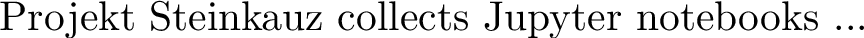

In [10]:
%%steinkauz --texfile text --texdir introtext --dpi 300
r"""
Projekt Steinkauz collects Jupyter notebooks ...
"""

The larger the DPI, the wider the text output, but also the more time consuming the processing. 

## DPI versus Magnification

The other argument magnification doesn't change the dpi, but simply scales the output. So, 300 dpi or 150 dpi magnified by 2 give the same sized PNG output. 

    %%steinkauz --dpi <DPI> --mag <magnification>
    r"""
    <latex>
    """


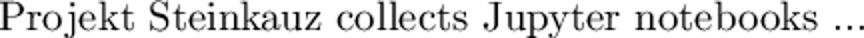

In [11]:
%%steinkauz --texfile text --texdir introtext --dpi 150 --mag 2
r"""
Projekt Steinkauz collects Jupyter notebooks ...
"""

Quality is obviously controlled by both the DPI and magnification value. Choose your poison!

## Interactive Use

A Jupyter Notebook is used interactively, and the output is imported back into a LaTeX document in two ways:

1. write a string out of the Jupyter Notebook into a file \<entry\>, whereby include \<entry\> in the LaTeX document, and let steinkauz replace the placeholder \<entry\> with the content of that file \<entry\>, where \<entry\> is any Python + LaTeX  + OS acceptable string, or

2. export a figure as EPS out of the Jupyter Notebook into a \<file\> in \<directory\> and read that file back into the LaTeX document, where \<file\> and \<directory\> are as for a LaTeX file.

Let's prepare an example for the first option:

In [12]:
import numpy
samples = numpy.random.randn(100)
mean = numpy.mean(samples)          # the value to be exported into the LaTeX doc
mean = (str(mean))[0:5]             # prepare string as it shall be written
with open('MEAN', 'w') as file:     # open a file MEAN
    file.write(mean)                # write value as string

Now, let's prepare an example for the second option:

In [ ]:
import os
from matplotlib import pyplot as plt
%matplotlib ipympl
plt.close(1)    # avoid accumulating figures in memory
plt.figure(1)   # open figure 
plt.hist(samples)
if not os.path.isdir('example'):
    os.mkdir('example')
plt.savefig(os.path.join('example', 'example.eps'), dpi=1200)   # write file with print-quality dpi

Now, let's prepare the LaTeX document with an \<entry\> called MEAN.

In [ ]:
%%steinkauz --texfile figure --texdir example --dpi 300 --mag 0.5 MEAN figure=123
r"""
\begin{figure}
    \begin{minipage}{8cm}
        \includegraphics[width=\textwidth]{example.eps}
        \caption{The mean is MEAN.}
    \end{minipage}
\end{figure}
"""

## Behind the Scene

The LaTeX fragment -- the cell or line input of the steinkauz magic -- is stored in a file with the postfix tpl. Then, a template -- .\\\\.steinkauz\\\\template.tex -- is wrapped around that LaTeX fragment. 

In [ ]:
import os
from ipywidgets import widgets, Layout
from IPython.display import display
with open(os.path.join('.steinkauz', 'template.tex')) as file:
    template = file.read()
display(
    widgets.Textarea(
        layout=Layout(width='800px', height='200px'),
        value=template))

The template contains one hard-wired placeholder called CELL. CELL will be replaced with the cell or line input from steinkauz's cell or line magic, respectively -- your LaTeX fragment --. This template file should not be modified unless you know what you are doing, and, of course, CELL must not be used otherwise.

Your own preamble file, however, is meant to be modified as you see fit. Here, I import the graphics package to process the above figures only. 

In [ ]:
import os
from ipywidgets import widgets, Layout
from IPython.display import display
with open(os.path.join('.', 'mypackages.tex')) as file:
    template = file.read()
display(
    widgets.Textarea(
        layout=Layout(width='800px', height='50px'),
        value=template))

## Main LaTeX

The template above calls the documentclass \"standalone\". That documentclass treats each LaTeX file as part of a larger, all-encompassing LaTeX document. That document is, here, called \"main.tex\" and stored in the same directory as your notebook.

In [ ]:
import os
from ipywidgets import widgets, Layout
from IPython.display import display
with open(os.path.join('.', 'tutorial.tex')) as file:
    template = file.read()
display(
    widgets.Textarea(
        layout=Layout(width='800px', height='300px'),
        value=template))

Finally, put everything together as one document in a main file called, here, \"tutorial.tex\" and generate the final high-quality printout. As of now, the main file must be written separately.

In [ ]:
# prepare final pdf file
%steinkauz --option printout --texfile tutorial --texdir .

## Cleanup

You can remove all COUNTER's, but, then, you have to re-create the numbers later. To clean up behind:

In [ ]:
%steinkauz --option clean